In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

In [2]:
df = pd.read_csv("../../Excel Files/penguins_size.csv")

In [3]:
df = df.dropna()

In [4]:
df.at[336,"sex"] = "FEMALE"

In [5]:
df["sex"].unique()

array(['MALE', 'FEMALE'], dtype=object)

In [6]:
X = pd.get_dummies(df.drop("species",axis=1),drop_first=True)
y = df["species"]

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
baseModel = RandomForestClassifier(n_estimators=10,
                                   max_features="sqrt",
                                   random_state=101)

In [10]:
baseModel.fit(X_train,y_train)

,n_estimators,10
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [11]:
yPredictions = baseModel.predict(X_test)

In [12]:
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay

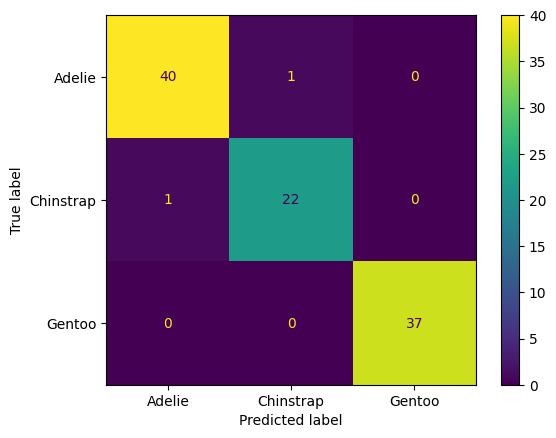

In [13]:
ConfusionMatrixDisplay(confusion_matrix(y_test,yPredictions),display_labels=y.unique()).plot()

In [14]:
print(classification_report(y_test,yPredictions))

              precision    recall  f1-score   support

      Adelie       0.98      0.98      0.98        41
   Chinstrap       0.96      0.96      0.96        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.98       101
   macro avg       0.98      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101

